# Import Class

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()
X_df = data_fetcher.get_X_df()



------class run complete------



# Initial Model

In [2]:
#train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42) #n_estimators: 100, max_depth = 2
rf1.fit(X_train, y_train)

#predict
y_pred_1 = rf1.predict(X_test)


#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------RF Metrics----------

Accuracy: 0.8833333333333333
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1 Score: 0.9041095890410958

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.90        36

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## confusion matrix of the initial model

[[20  4]
 [ 3 33]]


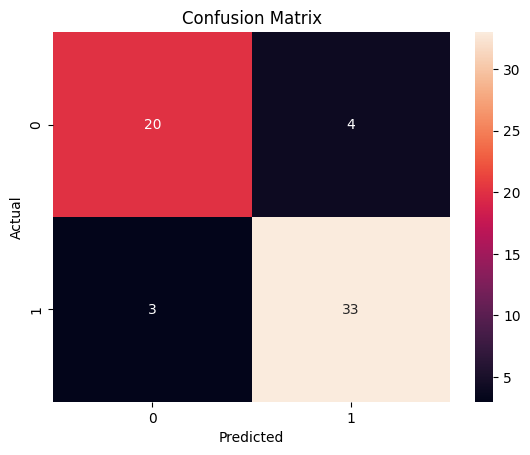

In [3]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search for best parameters

In [4]:
'''
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 10, 20, 40, 80, 90, 100, 110],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [4, 8, 10, 20, 30],
    'min_samples_split': [4, 8, 10, 20, 30],
    'n_estimators': [20, 50, 100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

#take the best estimator as final model
rf2 = grid_search.best_estimator_

#print the best parameters
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
'''

'\n# hyperparameter tuning\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'bootstrap\': [True],\n    \'max_depth\': [2, 4, 10, 20, 40, 80, 90, 100, 110],\n    \'max_features\': ["sqrt", "log2"],\n    \'min_samples_leaf\': [4, 8, 10, 20, 30],\n    \'min_samples_split\': [4, 8, 10, 20, 30],\n    \'n_estimators\': [20, 50, 100, 200, 300, 1000]\n}\n\ngrid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)\ngrid_search.fit(X_train, y_train)\n\n#take the best estimator as final model\nrf2 = grid_search.best_estimator_\n\n#print the best parameters\nprint(grid_search.best_params_)\nprint(grid_search.best_estimator_)\nprint(grid_search.best_score_)\n'

# Final Model

## Basic Metrics

In [5]:
#train RandomForestClassifier tuned
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)

rf2.fit(X_train, y_train)

#predict
y_pred = rf2.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Final RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------Final RF Metrics----------

Accuracy: 0.95
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1 Score: 0.9589041095890412

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.95      0.97      0.96        36

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60



## Confusion Matrix

[[22  2]
 [ 1 35]]


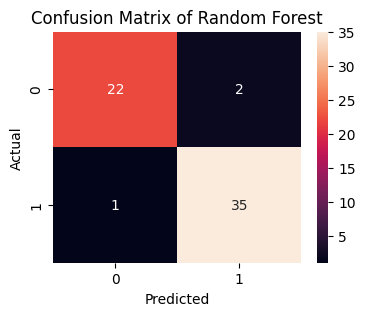

In [6]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [7]:
#cross validation for 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf2, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.


Fold 0 : 0.8275862068965517
Fold 1 : 0.8
Fold 2 : 0.8799999999999999
Fold 3 : 0.8275862068965517
Fold 4 : 0.8461538461538461
Fold 5 : 0.8
Fold 6 : 0.8000000000000002
Fold 7 : 0.8333333333333334
Fold 8 : 0.8181818181818182
Fold 9 : 0.7692307692307692

Mean: 0.820207218069287
Standard Deviation: 0.028908984245926694
Variance: 0.0008357293701312378


## ROC

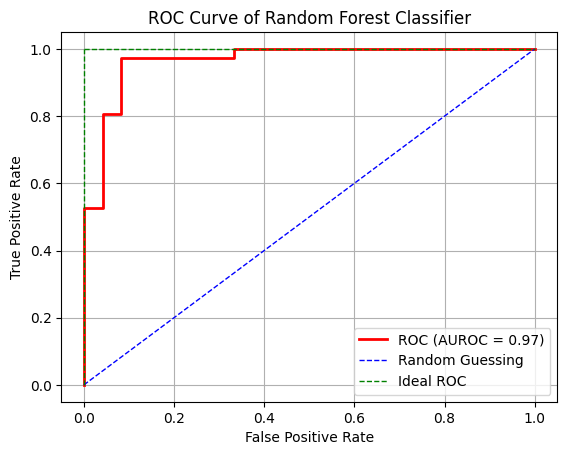

In [8]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#plot the roc curve
y_pred_proba = rf2.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
plt.plot(fpr,tpr,'r', label="ROC (AUROC = %0.2f)" % auc, linewidth = 2) 

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Random Forest Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()


## PRC

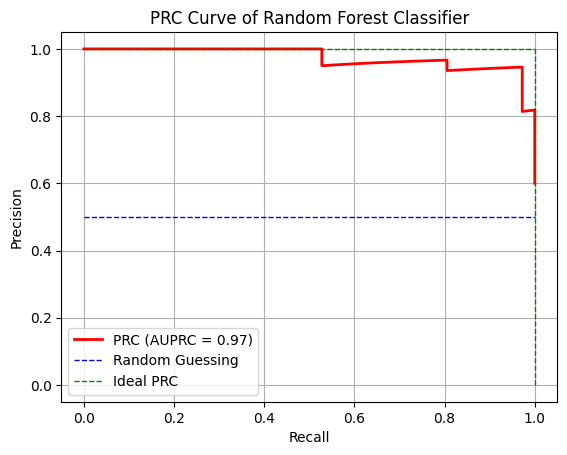

In [9]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Random Forest Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

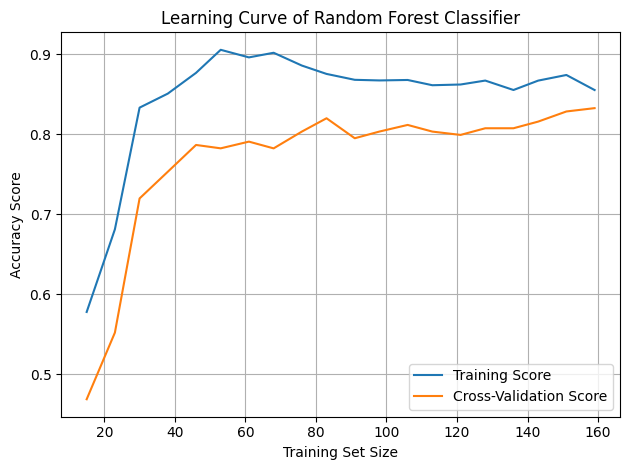

In [10]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(rf2, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.grid()
plt.show()

# Features Importance

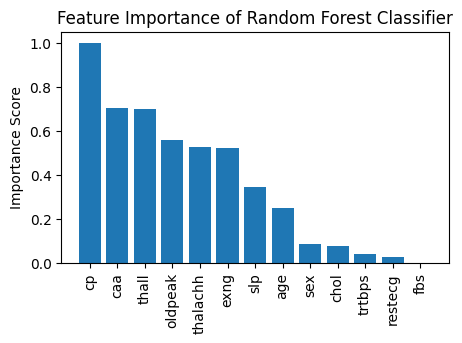

In [11]:
# get the feature importance
import pandas as pd, numpy as np
importances = rf2.feature_importances_

#scale the feature importance to the range of 0 to 1
importances = importances / np.max(importances)

#get the indices of the features in descending order of importance
indices = np.argsort(importances)[::-1]

#get the names of the features in descending order of importance
names = [list(features)[i] for i in indices]



#plot the feature importance
plt.figure(figsize=(5,3))
plt.title("Feature Importance of Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances[indices] ) #X_train.shape[1] means the number of columns in X_train
plt.xticks(range(X_train.shape[1]),names, rotation=90) #names is the list of feature names in descending order of importance
plt.ylabel("Importance Score")
plt.show()

# Save the Model using Joblib

In [12]:
import joblib
joblib.dump(rf2, "joblib_dump/RFC.pkl")

['joblib_dump/RFC.pkl']

# Explainable AI
Using SHAP (SHapley Additive exPlanations) library to explain the model's predictions.

## SHAP (SHapley Additive exPlanations) 

**Intro:**
- SHAP is a popular library that provides a unified approach to explain the output of any machine learning model. 
- It's based on the concept of Shapley values from cooperative game theory and aims to provide intuitive insights into how individual features contribute to a model's predictions.
- It helps you understand how different features contribute to individual predictions, providing insights into the model's decision-making process.

**SHAP Values:**
- SHAP values quantify the contribution of each feature to a prediction compared to a baseline prediction (tree_explainer.expected_value).
- Positive SHAP values indicate a feature's positive impact on the prediction(predicting 1 class),
- while negative values indicate a negative impact (predicting 0 class).


**Summary Bar Plot:**

- A summary bar plot displays the average impact of each feature on model predictions.
- Features are sorted by their importance, with bars indicating how much each feature pushed predictions higher (blue) or lower (red).
The length of the bar represents the magnitude of the feature's impact.

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


[array([[ 0.00769007, -0.01217798, -0.06819072, ...,  0.02516347,
        -0.04978095, -0.04692434],
       [-0.02119717,  0.0068516 ,  0.08787276, ..., -0.0289358 ,
         0.06990619, -0.04276875],
       [-0.00342288,  0.00564542,  0.08204232, ...,  0.02702715,
         0.0596143 ,  0.06070056],
       ...,
       [-0.01917742, -0.01091011,  0.08673125, ...,  0.02458279,
        -0.04954406, -0.04361804],
       [-0.01839388,  0.00647557,  0.08934547, ...,  0.02799265,
         0.06313717, -0.04403601],
       [-0.02309586,  0.00594392, -0.07137795, ...,  0.02341182,
        -0.04678302,  0.07916211]]), array([[-0.00769007,  0.01217798,  0.06819072, ..., -0.02516347,
         0.04978095,  0.04692434],
       [ 0.02119717, -0.0068516 , -0.08787276, ...,  0.0289358 ,
        -0.06990619,  0.04276875],
       [ 0.00342288, -0.00564542, -0.08204232, ..., -0.02702715,
        -0.0596143 , -0.06070056],
       ...,
       [ 0.01917742,  0.01091011, -0.08673125, ..., -0.02458279,
        

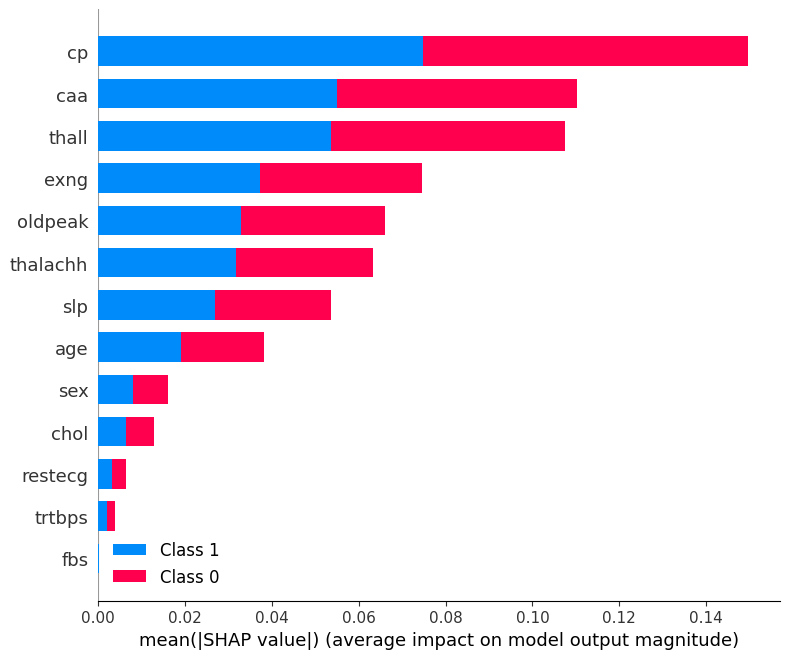

In [13]:
import shap
tree_explainer = shap.explainers.Tree(rf2)
shap_values = tree_explainer.shap_values(X_train)
print(shap_values)
shap.summary_plot(shap_values, X_test, feature_names=features)


In [14]:
'''shap_values = tree_explainer.shap_values(X_test)
explanation = shap.Explanation(shap_values[1], feature_names=features, output_names=[0,1])
shap.plots.beeswarm(explanation)'''

'shap_values = tree_explainer.shap_values(X_test)\nexplanation = shap.Explanation(shap_values[1], feature_names=features, output_names=[0,1])\nshap.plots.beeswarm(explanation)'

In [15]:
'''import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP explainer for your trained Random Forest model
#explainer = shap.Explainer(rf2, X_train)

#shap_values = explainer(X_test, check_additivity=False)

tree_explainer = shap.explainers.Tree(rf2)
shap_values = tree_explainer.shap_values(X_train)

# Plot a summary plot of SHAP values
shap.summary_plot(X_test, shap_values, plot_type="bar" , feature_names=features, plot_size=(10,5),
                  sort = True, color = 'green')
plt.show()'''


'import shap\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Create a SHAP explainer for your trained Random Forest model\n#explainer = shap.Explainer(rf2, X_train)\n\n#shap_values = explainer(X_test, check_additivity=False)\n\ntree_explainer = shap.explainers.Tree(rf2)\nshap_values = tree_explainer.shap_values(X_train)\n\n# Plot a summary plot of SHAP values\nshap.summary_plot(X_test, shap_values, plot_type="bar" , feature_names=features, plot_size=(10,5),\n                  sort = True, color = \'green\')\nplt.show()'

Waterfall Plot:

- A waterfall plot illustrates the journey from a baseline prediction to an actual prediction for a specific instance.
- Vertical bars represent the contribution of each feature to the change in prediction, and arrows show the direction (positive or negative) of the contribution.
- Red: predicting heart attack (1)
- Blue: predicting no heart attack (0)
- f(x): model's prediction after considering all features.
- E[f(x)]: baseline prediction without considering any features. Purely on value counts of samples (not sure).

Predicted Class: 1
Actual Class: 1
[0 1]
[ 45.   0.   1. 112. 160.   0.   1. 138.   0.   0.   1.   0.   2.]


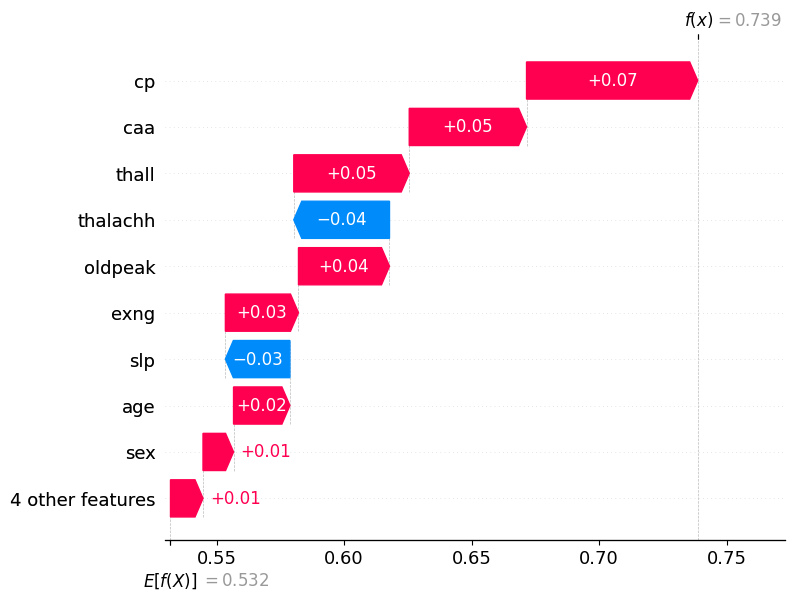

In [16]:
v = 6
yhat = rf2.predict(X_test[v].reshape(1,-1))
print('Predicted Class: %d' % yhat)
print("Actual Class: %d" % y_test[v])
print(rf2.classes_)

# Choose a specific data point to explain (index 0 in this case)
data_to_explain = X_test[v]
print(data_to_explain)

# Calculate SHAP values for the chosen data point
shap_values = tree_explainer.shap_values(data_to_explain)

# Create a waterfall plot using SHAP values
shap.plots._waterfall.waterfall_legacy(tree_explainer.expected_value[1], shap_values[1], feature_names=features)

plt.show()


**Decision Plot:**

- A decision plot helps visualize the effects of individual features on a specific prediction using SHAP values.
- It shows the baseline prediction(bottom line), the actual prediction(top colored line) for the instance, and the contributions of each feature (vertical colored lines - no.of lines = len(X_test)).
- Vertical lines connect feature contributions, allowing you to see how they collectively shape the prediction.
- The length of the vertical lines gives the SHAP values.
- Vertical lines represents the sum of the contributions from the features to the prediction.
- It starts from the baseline prediction (average prediction) and accumulates the effects of features as you move along the plot.

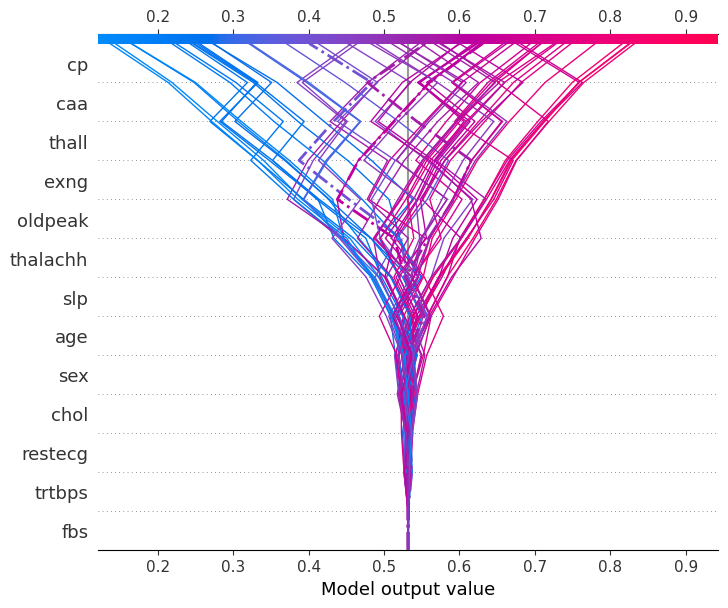

In [17]:
tree_explainer = shap.explainers.Tree(rf2)
shap_values = tree_explainer.shap_values(X_test)
misclassified = np.where(y_test != rf2.predict(X_test))[0]
shap.decision_plot(tree_explainer.expected_value[1], shap_values[1], features, highlight= misclassified)

# to plot opposite plot,
#shap.decision_plot(tree_explainer.expected_value[0], shap_values[0], features)

**Missclassified Decision Plot:**

- Takes missclassified data and plots them on a graph
- compare the computed probabilities from the model and the probabilities in the graph(colored line). they're the same!
- also, compare these with the confusion matrix. we have 2 false positives and 1 false negative. the graph shows the same thing.

[24 37 51]
[0.40094693 0.63043628 0.55532348]


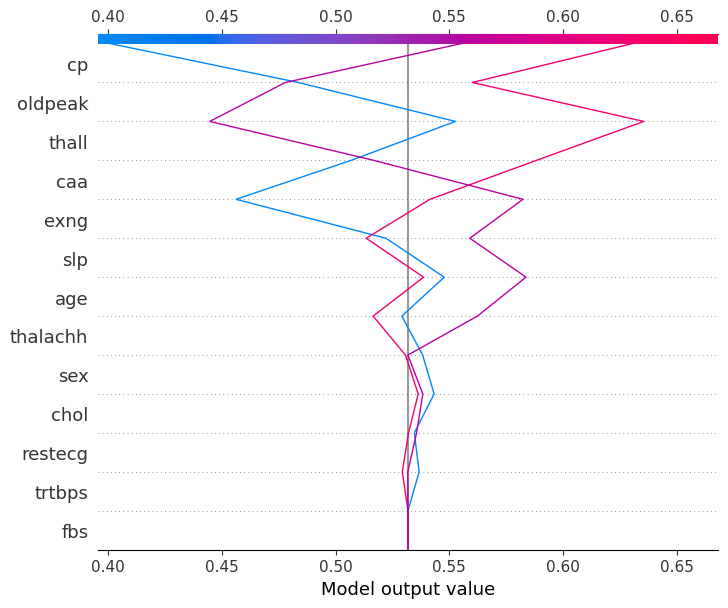

In [18]:
misclassified = np.where(y_test != rf2.predict(X_test))[0]
print(misclassified)
# get predict probabilities of class being 1 as misclassified 
misclassified_prob = rf2.predict_proba(X_test)[misclassified][:, 1]
print(misclassified_prob)
shap_values = tree_explainer.shap_values(np.array([X_test[24], X_test[37], X_test[51]]))
shap.decision_plot(tree_explainer.expected_value[1], shap_values[1], features)

## Calibration Curve

Calibration curves, also referred to as reliability diagrams, compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the frequency of the positive label (to be more precise, an estimation of the conditional event probability ) on the y-axis against the predicted probability predict_proba of a model on the x-axis. 

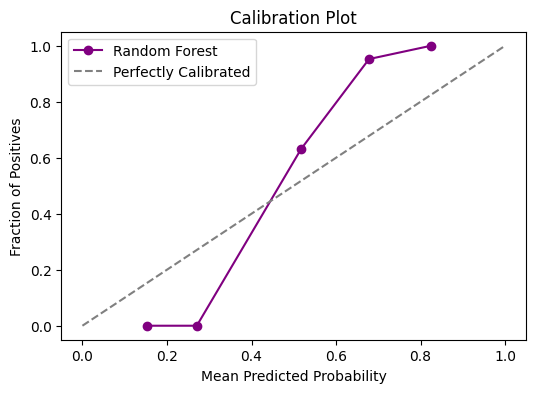

In [19]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute the probabilities predicted by the model
y_pred_probs = rf2.predict_proba(X_test)[:, 1]

# Create a calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_probs, n_bins=5)

plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', label = "Random Forest", color = 'purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()


## Partial Dependency Plots
- Partial Dependency Plots (PDPs) are visualizations that help us understand the relationship between a specific feature in our dataset and the predicted outcome of a machine learning model. 
- PDPs provide insights into how a feature's value influences the model's predictions while keeping the values of other features fixed or averaged.

Here's how partial dependency plots work and what they can reveal:

1. **Feature Isolation**: A PDP focuses on a single feature of interest while holding the values of other features constant(avgerage value). This isolation allows you to observe the independent effect of the chosen feature on the model's predictions.

2. **Data Range**: The range of values for the chosen feature is divided into bins or intervals. The data points within each bin are grouped together. Here, the *grid_resolution* parameter is for binning.

3. **Model Predictions**: For each bin, the average or predicted outcome (e.g., probability) from the model is calculated. This average represents the model's prediction for that range of feature values.

4. **Visualization**: The PDP is then visualized as a line plot. The x-axis shows the values of the chosen feature, and the y-axis displays the model's predicted outcome( probabilities in this case). The plot displays how the predicted outcome changes as the feature's value varies across its range.

### PDPs for top 6 features
top 6 are considered from the shap values.

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


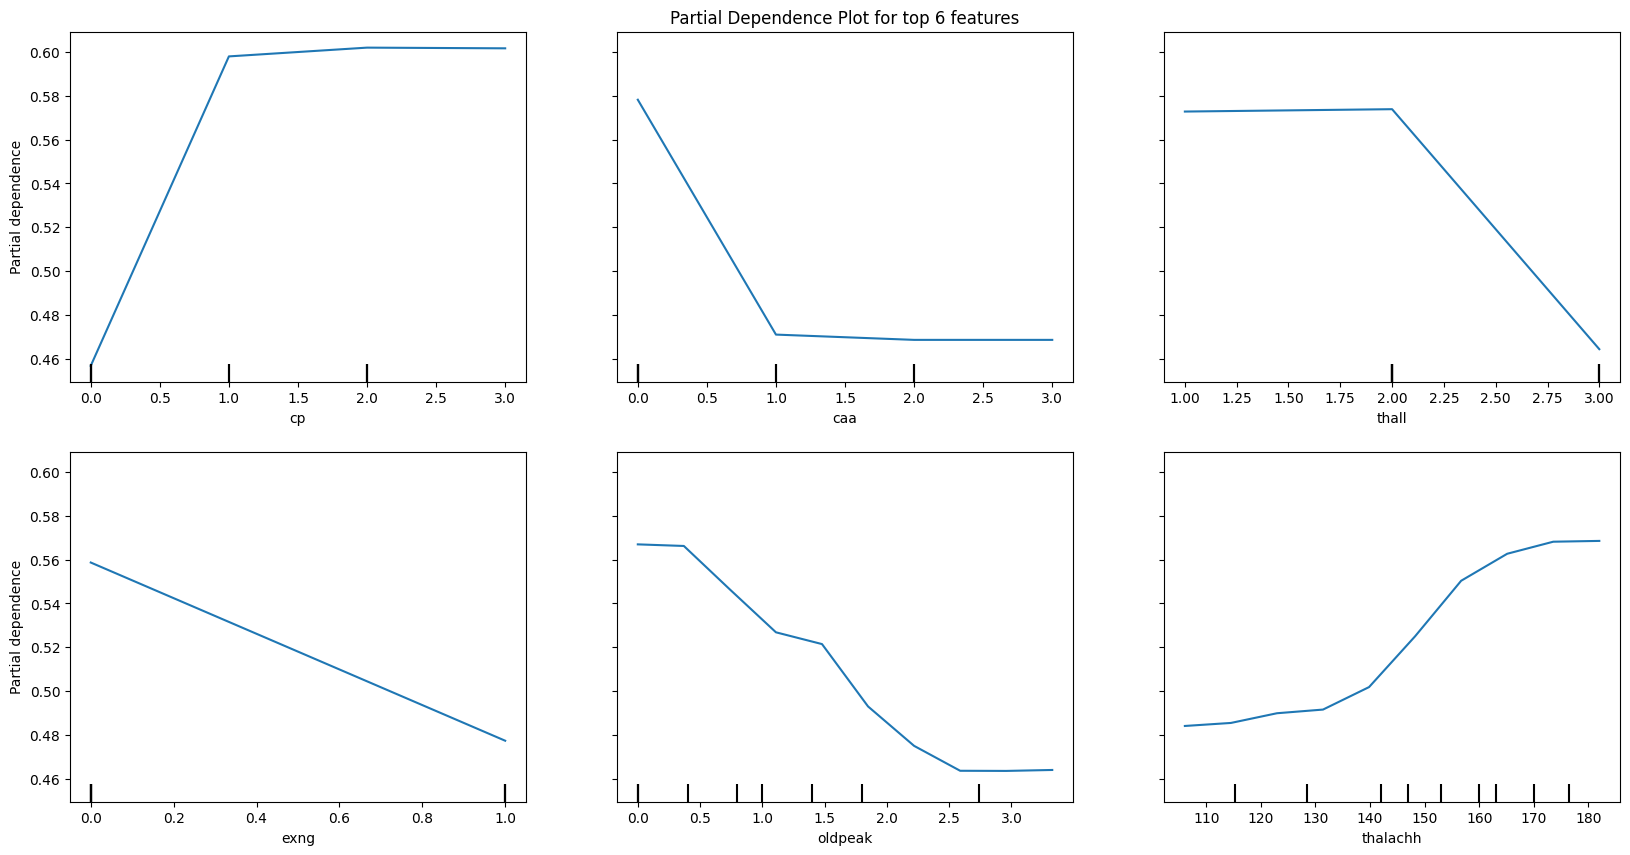

In [20]:
print(features)
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

rf3 = RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)

rf3.fit(X_train_df, y_train)

from sklearn.inspection import PartialDependenceDisplay
# Plot partial dependence
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Partial Dependence Plot for top 6 features")
PartialDependenceDisplay.from_estimator(rf3, X_train_df,["cp", "caa","thall", "exng","oldpeak", "thalachh"] , 
                                        grid_resolution=10, ax = ax)
plt.show()


**Interpretation of above graph:**
These top 6 features show *linear (positive or negative) relationship* with the predicted probabilities. This indicates how influential these features are in predicting the target variable.

- For categorical features (cp, caa, thall, exng): these features exhibit higher relationship with the predicted probabilities. Interpret these in medical terms.
- For numerical features (oldpeak and thalachh):
    - As the oldpeak value increases, the probability of having heart disease decreases. 
    - As the thalachh value increases, the probability of having heart disease increases.
- justify this behavior with medical norms.

### PDPs of next 6 features

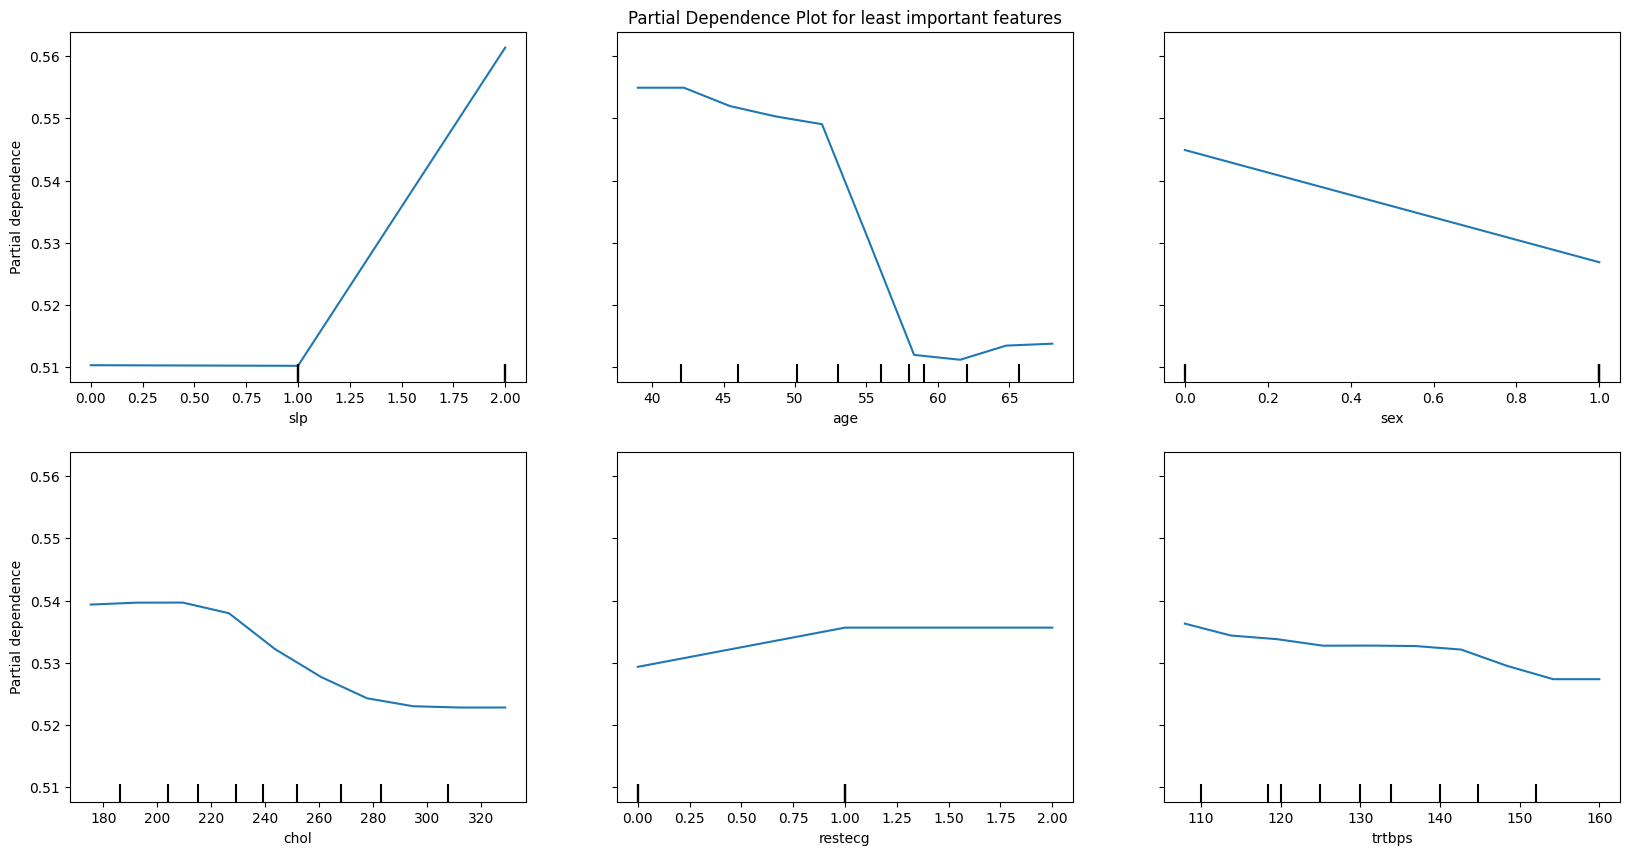

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Partial Dependence Plot for least important features")
PartialDependenceDisplay.from_estimator(rf3, X_train_df,["slp", "age","sex", "chol","restecg", "trtbps"] , grid_resolution=10, ax = ax)
plt.show()

**Interpretation of above graph:**
- We observe that the curve flattens as the features are plotted. This means that the feature has little or no impact on the prediction.
- A flat or nearly flat PDP line indicates that changes in the chosen feature's values do not have a significant linear impact on the predicted outcome.
- This could suggest that other features (top 6) or interactions are driving the predictions.
- justify this behavior with medical norms.

# The End